In [28]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

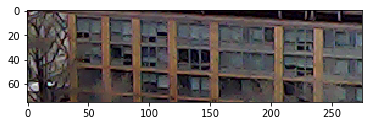

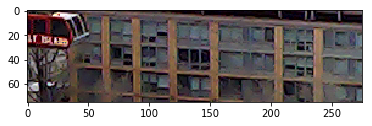

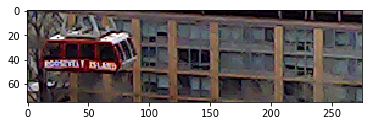

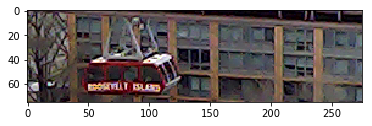

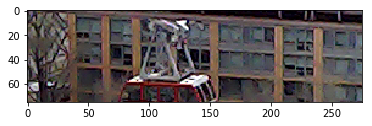

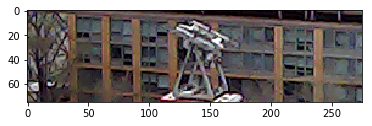

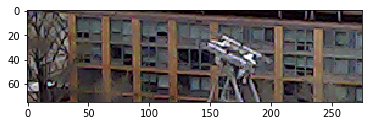

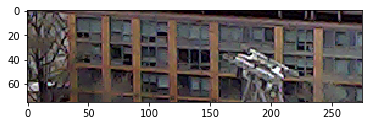

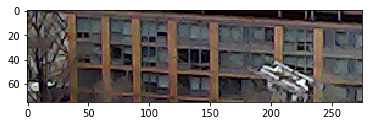

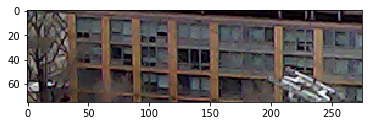

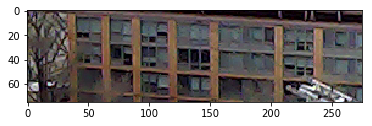

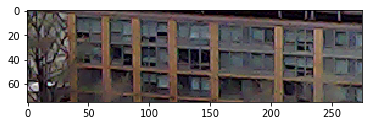

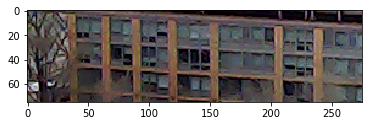

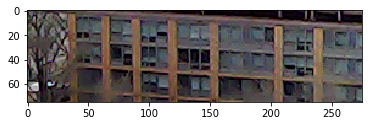

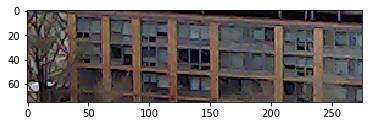

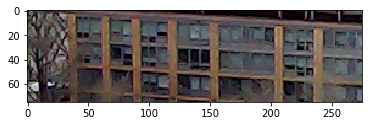

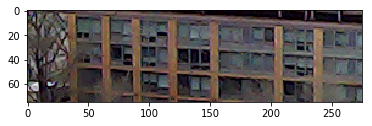

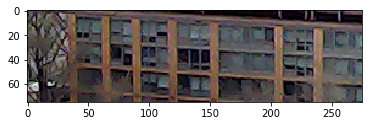

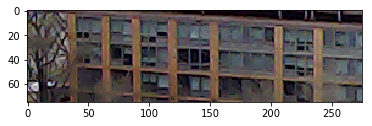

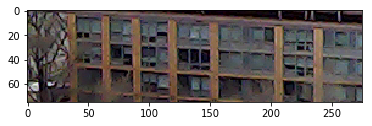

In [29]:
image_paths_stable = [
    "Other/Arriving1/jpeg/1525101110.jpeg",
    "Other/Arriving1/jpeg/1525101112.jpeg",
    "Other/Arriving1/jpeg/1525101113.jpeg",
    "Other/Arriving1/jpeg/1525101114.jpeg",
    "Other/Arriving1/jpeg/1525101115.jpeg",
    "Other/Arriving1/jpeg/1525101116.jpeg",
    "Other/Arriving1/jpeg/1525101118.jpeg",
    "Other/Arriving1/jpeg/1525101119.jpeg",
    "Other/Arriving1/jpeg/1525101120.jpeg"
]

image_paths = [
    "Other/Arriving1/jpeg/1525101082.jpeg",
    "Other/Arriving1/jpeg/1525101083.jpeg",
    "Other/Arriving1/jpeg/1525101084.jpeg",
    "Other/Arriving1/jpeg/1525101085.jpeg",
    "Other/Arriving1/jpeg/1525101087.jpeg",
    "Other/Arriving1/jpeg/1525101088.jpeg",
    "Other/Arriving1/jpeg/1525101089.jpeg",
    "Other/Arriving1/jpeg/1525101090.jpeg",
    "Other/Arriving1/jpeg/1525101091.jpeg",
    "Other/Arriving1/jpeg/1525101093.jpeg",
    "Other/Arriving1/jpeg/1525101094.jpeg"]

images = list()
images_stable = list()

for image_path in image_paths:
    image = mpimg.imread(image_path)
    image_cropped = image[125:200, 325:600]
    images.append(image_cropped)
    
    image_plot = plt.imshow(image_cropped)
    plt.show()
    
for image_path in image_paths_stable:
    image = mpimg.imread(image_path)
    image_cropped = image[125:200, 325:600]
    images_stable.append(image_cropped)
    
    image_plot = plt.imshow(image_cropped)
    plt.show()

In [30]:
for i in range(1, len(images), 1):
    diff = cv2.absdiff(images[i - 1], images[i])
    print(diff.sum())

704503
1068755
1283040
1235497
1158775
1012598
811590
760162
683879
654877


In [31]:
for i in range(1, len(images_stable), 1):
    diff = cv2.absdiff(images_stable[i - 1], images_stable[i])
    print(diff.sum())

473126
472717
472344
466709
473679
477586
476685
476285


1283040
(75, 275, 3)


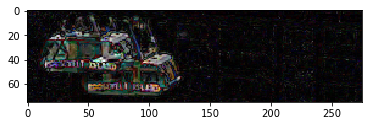

In [32]:
diff = cv2.absdiff(images[2], images[3])
print(diff.sum())
print(diff.shape)

image_plot = plt.imshow(diff)
plt.show()

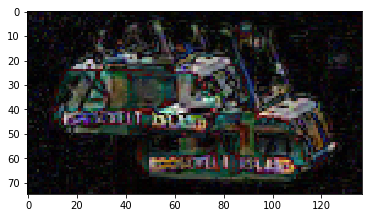

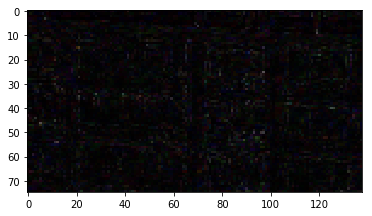

In [33]:
# diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
diff_left = diff[:, :(diff.shape[1] // 2), :]
diff_right = diff[:, (diff.shape[1] // 2):, :]

image_plot = plt.imshow(diff_left)
plt.show()

image_plot = plt.imshow(diff_right)
plt.show()

In [34]:
print(diff_left.sum())
print(diff_right.sum())

1040688
242352


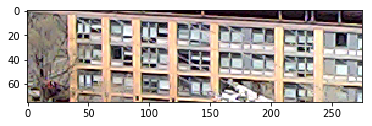

In [35]:
image = mpimg.imread("1525196775-ARRIVING.jpeg")
image_cropped = image[125:200, 325:600]

image_plot = plt.imshow(image_cropped)
plt.show()

In [191]:
import time
import datetime

d = datetime.datetime.now()
print(int(d.strftime('%H%M%S')))
print(int(d.weekday()))

224123
1


In [230]:
def _get_tram_interval():
    current_datetime = datetime.datetime.now()
    current_time = int(d.strftime('%H%M%S'))
    current_weekday = int(d.weekday())
    
    # If the tram is not currently running return no interval
    if _is_active(current_time, current_weekday) == False:
        return None
    
    # If it is a weekday check for rush hour
    if _is_rush_hour(current_time, current_weekday):
        # 5 minutes of air time in seconds
        return 300
    
    # 10 minutes of air time in seconds
    return 600

def _is_tram_active(current_time, current_weekday):
    # 6:00am
    opening_time = 60000
    
    # 2:00am
    closing_time = 20000
    
    # Saturday and Sunday mornings (late night)
    if _is_weekend(current_weekday):
        # 3:30am
        closing_time = 33000
        
    return current_time >= opening_time or current_time < closing_time

def _is_rush_hour(current_time, current_weekday):
    if _is_weekend(current_weekday):
        return False
    
    # 7:00am
    morning_start_time = 70000
    
    # 10:00am
    morning_end_time = 100000
    
    # 3:00pm
    evening_start_time = 150000
    
    # 8:00pm
    evening_end_time = 200000
    
    # If the current time is within the morning rush hour interval
    if current_time >= morning_start_time and current_time < morning_end_time:
        return True
    
    # If the current time is within the evening rush hour interval
    if current_time >= evening_start_time and current_time < evening_end_time:
        return True
    
    return False

def _is_weekend(current_weekday):
    # If the current weekday is a weekend day
    return current_weekday == 5 or current_weekday == 6

_get_tram_interval()

600